# Basic Regression Models

In [1]:
# data manipulation
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

# visualiation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# model
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn import svm
from sklearn import tree
from sklearn import neural_network
from sklearn import metrics

# other models
from statsmodels.tsa.vector_ar.var_model import VAR
import xgboost as xgb

# load data
from utils import read_data, split_data

In [2]:
count, df = read_data(normalize = False)

Loaded  data/PRSA_Data_Gucheng_20130301-20170228.csv
Loaded  data/PRSA_Data_Huairou_20130301-20170228.csv
Loaded  data/PRSA_Data_Tiantan_20130301-20170228.csv
Loaded  data/PRSA_Data_Changping_20130301-20170228.csv
Loaded  data/PRSA_Data_Guanyuan_20130301-20170228.csv
Loaded  data/PRSA_Data_Nongzhanguan_20130301-20170228.csv
Loaded  data/PRSA_Data_Wanliu_20130301-20170228.csv
Loaded  data/PRSA_Data_Dongsi_20130301-20170228.csv
Loaded  data/PRSA_Data_Wanshouxigong_20130301-20170228.csv
Loaded  data/PRSA_Data_Aotizhongxin_20130301-20170228.csv
Loaded  data/PRSA_Data_Dingling_20130301-20170228.csv
Loaded  data/PRSA_Data_Shunyi_20130301-20170228.csv
35064 rows per station, total 382168 rows


In [3]:
df.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,WD_E,WD_ENE,WD_ESE,WD_N,WD_NE,WD_NNE,WD_NNW,WD_NW,WD_S,WD_SE,WD_SSE,WD_SSW,WD_SW,WD_W,WD_WNW,WD_WSW
count,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.00000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000
mean,79.432383,104.573837,15.634814,50.570068,1229.940563,57.376676,13.518694,1010.813471,2.417195,0.065030,1.738031,0.071424,0.081480,0.058058,0.073251,0.102884,0.066976,0.060581,0.078609,0.04627,0.048055,0.042016,0.054154,0.068964,0.041654,0.057975,0.047649
std,80.154901,91.379446,21.306103,35.062086,1157.151476,56.709013,11.425355,10.452381,13.798402,0.823901,1.241152,0.257532,0.273571,0.233854,0.260548,0.303808,0.249980,0.238560,0.269129,0.21007,0.213882,0.200625,0.226322,0.253394,0.199799,0.233696,0.213023
min,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,36.000000,2.000000,23.000000,500.000000,10.495800,3.100000,1002.400000,-9.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.400000,1010.400000,3.000000,0.000000,1.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,111.000000,145.000000,19.000000,71.000000,1500.000000,82.000000,23.200000,1019.000000,15.100000,0.000000,2.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,844.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station,time_stamp,WD_E,WD_ENE,WD_ESE,WD_N,WD_NE,WD_NNE,WD_NNW,WD_NW,WD_S,WD_SE,WD_SSE,WD_SSW,WD_SW,WD_W,WD_WNW,WD_WSW
20,13.0,25.0,12.0,5.0,1100.0,61.0,1.6,1027.1,-18.4,0.0,1.9,Gucheng,2013-03-01,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
21,15.0,23.0,14.0,13.0,1200.0,52.0,1.0,1028.1,-17.4,0.0,0.7,Gucheng,2013-03-01,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
22,16.0,28.0,16.0,19.0,1200.0,45.0,1.3,1028.4,-17.6,0.0,1.0,Gucheng,2013-03-01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,16.0,28.0,14.0,20.0,1100.0,44.0,0.2,1028.6,-17.6,0.0,1.1,Gucheng,2013-03-01,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
24,14.0,18.0,24.0,43.0,1399.0,25.0,-0.3,1028.9,-18.0,0.0,1.4,Gucheng,2013-03-02,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df.columns

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'WSPM', 'station', 'time_stamp', 'WD_E', 'WD_ENE', 'WD_ESE',
       'WD_N', 'WD_NE', 'WD_NNE', 'WD_NNW', 'WD_NW', 'WD_S', 'WD_SE', 'WD_SSE',
       'WD_SSW', 'WD_SW', 'WD_W', 'WD_WNW', 'WD_WSW'],
      dtype='object')

In [6]:
# drop columns
cols = ['PM10', 'station', 'time_stamp', 'WD_E', 'WD_ENE', 'WD_ESE',
       'WD_N', 'WD_NE', 'WD_NNE', 'WD_NNW', 'WD_NW', 'WD_S', 'WD_SE', 'WD_SSE',
       'WD_SSW', 'WD_SW', 'WD_W', 'WD_WNW', 'WD_WSW']
df = df.drop(columns=cols)

In [7]:
df.describe()

,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000
mean,79.432383,15.634814,50.570068,1229.940563,57.376676,13.518694,1010.813471,2.417195,0.065030,1.738031
std,80.154901,21.306103,35.062086,1157.151476,56.709013,11.425355,10.452381,13.798402,0.823901,1.241152
min,2.000000,0.285600,2.000000,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,0.000000
25%,20.000000,2.000000,23.000000,500.000000,10.495800,3.100000,1002.400000,-9.000000,0.000000,0.900000
50%,55.000000,7.000000,43.000000,900.000000,45.000000,14.400000,1010.400000,3.000000,0.000000,1.400000
75%,111.000000,19.000000,71.000000,1500.000000,82.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,844.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


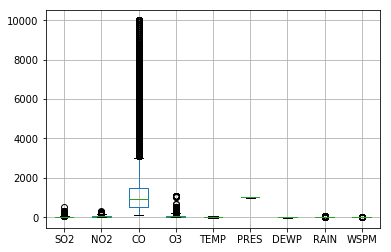

In [8]:
df.drop(columns=['PM2.5']).boxplot()
# outlier

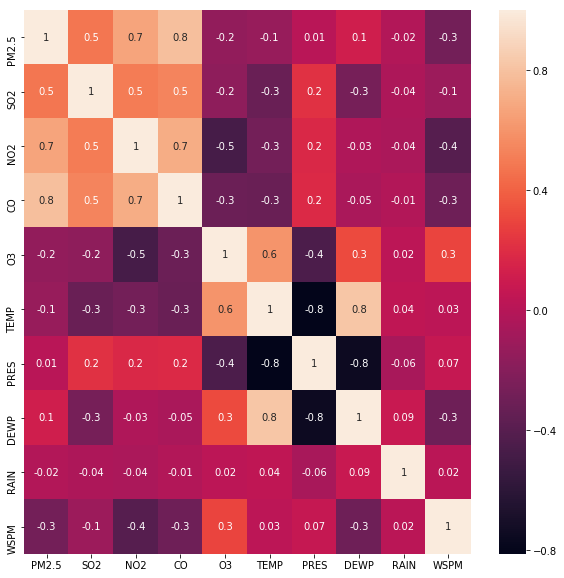

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, fmt='.1g')

In [10]:
# find correlation factor between features
df.corr()

,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.482209,0.670753,0.792041,-0.151149,-0.128907,0.013717,0.118009,-0.015268,-0.275686
SO2,0.482209,1.000000,0.501317,0.535289,-0.167093,-0.320991,0.218994,-0.266446,-0.040618,-0.109259
NO2,0.670753,0.501317,1.000000,0.705651,-0.476812,-0.276387,0.172287,-0.028276,-0.043946,-0.402566
CO,0.792041,0.535289,0.705651,1.000000,-0.315060,-0.323402,0.183800,-0.054173,-0.013302,-0.297760
O3,-0.151149,-0.167093,-0.476812,-0.315060,1.000000,0.597098,-0.447437,0.313267,0.023194,0.296714
TEMP,-0.128907,-0.320991,-0.276387,-0.323402,0.597098,1.000000,-0.812456,0.820672,0.037182,0.026664
PRES,0.013717,0.218994,0.172287,0.183800,-0.447437,-0.812456,1.000000,-0.750758,-0.060999,0.072249
DEWP,0.118009,-0.266446,-0.028276,-0.054173,0.313267,0.820672,-0.750758,1.000000,0.086424,-0.299137
RAIN,-0.015268,-0.040618,-0.043946,-0.013302,0.023194,0.037182,-0.060999,0.086424,1.000000,0.021866
WSPM,-0.275686,-0.109259,-0.402566,-0.297760,0.296714,0.026664,0.072249,-0.299137,0.021866,1.000000


# Train Test Split

In [11]:
# split data into trainng 90% and test 10%
# split training data into training set and validation set 80:20 NOT RANDOM
training_df, validation_df, test_df = split_data(df)

Data is split into train, validation and test dataset successfully!


In [12]:
X_train = training_df.drop(columns=["PM2.5"])
y_train = training_df["PM2.5"]

X_validation = validation_df.drop(columns=["PM2.5"])
y_validation = validation_df["PM2.5"]

X_test = test_df.drop(columns=["PM2.5"])
y_test = test_df["PM2.5"]

In [13]:
transformer = StandardScaler().fit(X_train)
X_train = transformer.transform(X_train)
transformer = StandardScaler().fit(X_validation)
X_validation = transformer.transform(X_validation)

In [14]:
print(len(training_df))
print(len(validation_df))
print(len(test_df))

275161
68791
38216


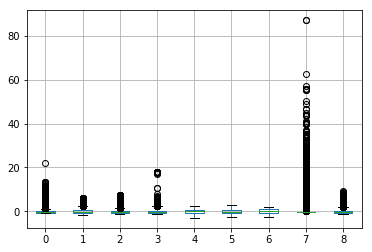

In [15]:
pd.DataFrame(X_train).boxplot()
# outlier

In [16]:
def model_fit_evaluate(reg, x_train, y_train, x_validation, y_validation):
    # Fit the mode: 
    print('Model \n', reg)
    reg.fit(x_train, y_train)
    
    # Make predictions using the validation set
    y_validation_pred = reg.predict(x_validation)
    
    # The coefficients
    if hasattr(reg, 'coef_'):
        print('Coefficients: \n', reg.coef_)
    if hasattr(reg, 'feature_importances_'):
        print('Feature Importances: \n', reg.feature_importances_)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_validation, y_validation_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_validation, y_validation_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_validation, y_validation_pred)))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination:', metrics.r2_score(y_validation, y_validation_pred))
    
    # The line / model
    plt.figure(figsize=(8,8))
    lineStart = y_validation.min() 
    lineEnd = y_validation.max() 
    plt.scatter(y_validation, y_validation_pred, marker='x')
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')

# 1. Linear Regression

Model 
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Coefficients: 
 [  6.37867368  25.25288526  44.19410565  15.52234927 -18.86686605
  -2.84370712  24.87910451  -1.25417742   5.90950274]
Mean Absolute Error: 29.58665922014582
Mean Squared Error: 1871.653471107078
Root Mean Squared Error: 43.26261054429192
Coefficient of determination: 0.7147459199673099


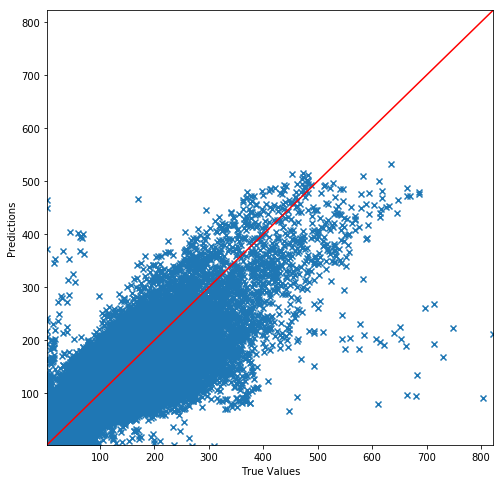

In [17]:
reg_linear = linear_model.LinearRegression()
model_fit_evaluate(reg_linear, X_train, y_train, X_validation, y_validation)

# 2. LARS Lasso
Least-angle regression (LARS) is a regression algorithm for high-dimensional data, developed by Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani. LARS is similar to forward stepwise regression. At each step, it finds the feature most correlated with the target. When there are multiple features having equal correlation, instead of continuing along the same feature, it proceeds in a direction equiangular between the features.

Model 
 LassoLars(alpha=0.005, copy_X=True, eps=2.220446049250313e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)
Coefficients: 
 [ 4.32955132 19.75381016 47.04447214  7.51126328  0.          0.
  9.00158961  0.          0.        ]
Mean Absolute Error: 29.84836095254622
Mean Squared Error: 1938.8769448420678
Root Mean Squared Error: 44.03268041854899
Coefficient of determination: 0.7045005564676585
CPU times: user 354 ms, sys: 59.9 ms, total: 414 ms
Wall time: 145 ms


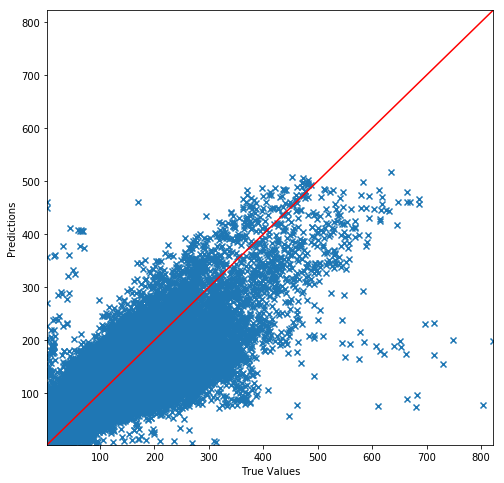

In [18]:
%%time
reg_lasso = linear_model.LassoLars(alpha=.005)
model_fit_evaluate(reg_lasso, X_train, y_train, X_validation, y_validation)

# 3. Linear SVM Regression

Model 
 LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)
Coefficients: 
 [ 4.73553055 16.36448308 52.21229596 13.3219354  -8.95805805 -2.62052615
 11.85266651 -0.56390449  3.02290015]
Mean Absolute Error: 27.687647194636476
Mean Squared Error: 1901.8622945034274
Root Mean Squared Error: 43.6103461864662
Coefficient of determination: 0.7101418678498532
CPU times: user 5.35 s, sys: 101 ms, total: 5.45 s
Wall time: 5.22 s


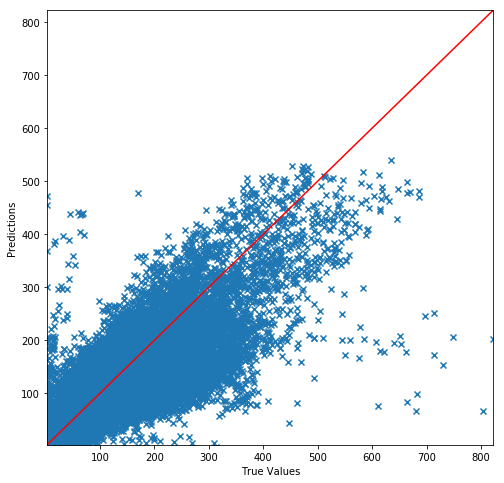

In [19]:
%%time
reg_linearsvm = svm.LinearSVR()
model_fit_evaluate(reg_linearsvm, X_train, y_train, X_validation, y_validation)

# 4. Outlier-robust regressors

Theil-Sen Estimator: robust multivariate regression model.

The algorithm calculates least square solutions on subsets with size n_subsamples of the samples in X. Any value of n_subsamples between the number of features and samples leads to an estimator with a compromise between robustness and efficiency. Since the number of least square solutions is “n_samples choose n_subsamples”, it can be extremely large and can therefore be limited with max_subpopulation. If this limit is reached, the subsets are chosen randomly. In a final step, the spatial median (or L1 median) is calculated of all least square solutions.

Model 
 TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=10000, n_jobs=None, n_subsamples=None,
         random_state=None, tol=0.001, verbose=False)
Coefficients: 
 [  6.7948016   16.75211469  56.47880739  15.42905194 -14.69171559
  -2.15835074  21.15910199  -8.46076408   6.10003715]
Mean Absolute Error: 28.94826097963996
Mean Squared Error: 1927.4736231766847
Root Mean Squared Error: 43.90300243920323
Coefficient of determination: 0.706238508541154
CPU times: user 1min 1s, sys: 9.94 s, total: 1min 11s
Wall time: 1min 13s


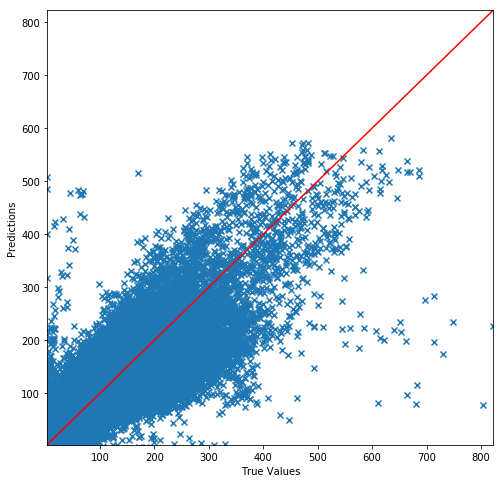

In [20]:
%%time
reg_huber = linear_model.TheilSenRegressor()
model_fit_evaluate(reg_huber, X_train, y_train, X_validation, y_validation)

# 5. Decision Trees Regression

Model 
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
Feature Importances: 
 [0.04363286 0.13217659 0.60649367 0.03420227 0.04197503 0.04144387
 0.07865487 0.00318684 0.01823399]
Mean Absolute Error: 27.88132459187975
Mean Squared Error: 2097.284989024727
Root Mean Squared Error: 45.79612417033484
Coefficient of determination: 0.6803579779344782
CPU times: user 2.11 s, sys: 25 ms, total: 2.14 s
Wall time: 2.13 s


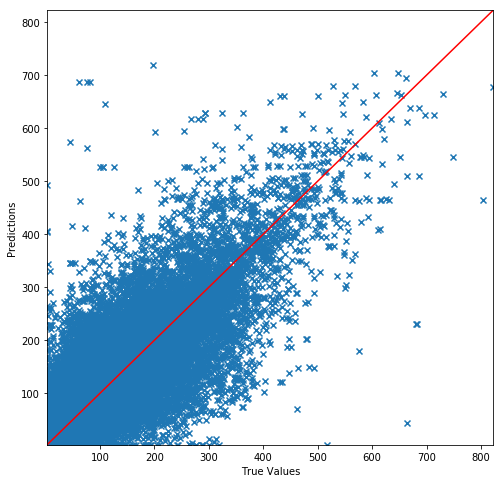

In [21]:
%%time
reg_dt = tree.DecisionTreeRegressor()
model_fit_evaluate(reg_dt, X_train, y_train, X_validation, y_validation)

# 6. XGBoost

In [22]:
training_df, validation_df, test_df = split_data(df)
X_train = training_df.drop(columns=["PM2.5"])
y_train = training_df["PM2.5"]

X_validation = validation_df.drop(columns=["PM2.5"])
y_validation = validation_df["PM2.5"]

X_test = test_df.drop(columns=["PM2.5"])
y_test = test_df["PM2.5"]

Data is split into train, validation and test dataset successfully!


In [23]:
# Transformation might not be necessary for xgboost
# transformer = MinMaxScaler().fit(X_train)
# X_train = transformer.transform(X_train)
# transformer = MinMaxScaler().fit(X_validation)
# X_validation = transformer.transform(X_validation)

In [24]:
model = xgb.XGBRegressor(
                 gamma=0,
                 booster='gbtree', #'gblinear'
                 eval_metric ='rmse',
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=100,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.8,
                 seed=42) 

In [25]:
%%time
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_validation, y_validation), (X_test, y_test)],
        eval_metric=['rmse'],
        verbose=False)

CPU times: user 21 s, sys: 82.8 ms, total: 21 s
Wall time: 21.1 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='rmse', gamma=0,
       importance_type='gain', learning_rate=0.07, max_delta_step=0,
       max_depth=3, min_child_weight=1.5, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
       silent=True, subsample=0.8)

In [26]:
def model_evaluate(reg, x_validation, y_validation):
    # Make predictions using the validation set
    y_validation_pred = reg.predict(x_validation)
    
    # The coefficients
    if hasattr(reg, 'coef_'):
        print('Coefficients: \n', reg.coef_)
    if hasattr(reg, 'feature_importances_'):
        print('Feature Importances: \n', reg.feature_importances_)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_validation, y_validation_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_validation, y_validation_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_validation, y_validation_pred)))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination:', metrics.r2_score(y_validation, y_validation_pred))
    
    # The line / model
    plt.figure(figsize=(8,8))
    lineStart = y_validation.min() 
    lineEnd = y_validation.max() 
    plt.scatter(y_validation, y_validation_pred, marker='x')
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')

Feature Importances: 
 [0.02840686 0.22040433 0.60025746 0.03539169 0.0154579  0.02872812
 0.05641465 0.01493902 0.        ]
Mean Absolute Error: 24.574335788062974
Mean Squared Error: 1519.4454141309795
Root Mean Squared Error: 38.980064316660375
Coefficient of determination: 0.768425079503926


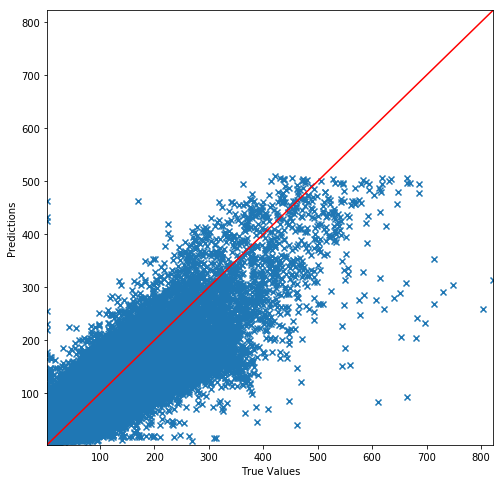

In [27]:
model_evaluate(model, X_validation, y_validation)

# 7. Multivariate Time Series
Vector Autoregression(VAR) is a multivariate forecasting algorithm that is used when two or more time series influence each other.
https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

In [28]:
training_df, validation_df, test_df = split_data(df)

Data is split into train, validation and test dataset successfully!


In [29]:
model = VAR(endog=training_df)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(validation_df))

In [30]:
#converting predictions to dataframe
cols = training_df.columns
pred = pd.DataFrame(np.row_stack(prediction), columns=[cols])

In [31]:
pred.head()

,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,80.496875,2.727347,60.881741,1102.817042,87.036347,27.694214,993.337873,19.133167,0.076714,1.260426
1,81.629700,3.349617,59.722822,1103.118236,86.272689,27.601495,993.469955,19.155086,0.107987,1.301759
2,82.509582,3.886511,58.579091,1101.864590,85.662407,27.520414,993.597021,19.167951,0.122129,1.330938
3,83.194237,4.351476,57.479031,1099.567372,85.172387,27.449513,993.719431,19.173574,0.129505,1.352269
4,83.719079,4.754639,56.436676,1096.523271,84.778838,27.387476,993.837435,19.173360,0.133995,1.368470


In [32]:
#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', np.sqrt(metrics.mean_squared_error(validation_df[[i]], pred[[i]])))

rmse value for PM2.5 is :  81.04086000396292
rmse value for SO2 is :  19.712553707851633
rmse value for NO2 is :  36.4570057004964
rmse value for CO is :  1164.291797785428
rmse value for O3 is :  57.125647359235096
rmse value for TEMP is :  11.459910010833967
rmse value for PRES is :  10.629621124795472
rmse value for DEWP is :  13.725235412122364
rmse value for RAIN is :  0.8499149395129255
rmse value for WSPM is :  1.2407595569666687


Mean Absolute Error: 60.27042815457343
Mean Squared Error: 6567.6209901819175
Root Mean Squared Error: 81.04086000396292
Coefficient of determination: -0.0009548842658322343


Text(0, 0.5, 'Predictions')

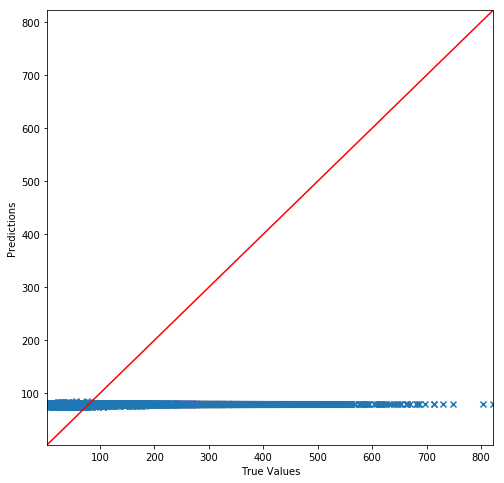

In [33]:
# Make predictions using the validation set
y_validation_pred = pred[['PM2.5']]

# The coefficients
print('Mean Absolute Error:', metrics.mean_absolute_error(validation_df[['PM2.5']], y_validation_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(validation_df[['PM2.5']], y_validation_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(validation_df[['PM2.5']], y_validation_pred)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination:', metrics.r2_score(validation_df[['PM2.5']], y_validation_pred))

# The line / model
plt.figure(figsize=(8,8))
lineStart = y_validation.min() 
lineEnd = y_validation.max() 
plt.scatter(validation_df[['PM2.5']], y_validation_pred, marker='x')
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Summary On Basic Models
- The lowest RMSE is 38.98 from XGBoost
- The highest Coefficient of Detemination is 0.768 from XGBoost
- VAR performs unexpected bad, probably due to some parameter settings or data preprocessing

Reference: 
https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score